In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Exercise 1

Verify installation.

In [11]:
data = pd.Series([5,2,7])
print (data)

0    5
1    2
2    7
dtype: int64


# Exercise 2

Construct a <strong>pandas</strong> data frame.

In [2]:
data = pd.DataFrame({
    "Id": [1,2,3,4,5,6,7,8,9,10,11,12],
    "Weight": [92,70,58,99,55,76,62,92,71,70,77,79],
    "Exercise": [6,6,6,2,8,4,6,6,5,6,4,4],
    "Cholesterol": [4.8,5.1,6.4,6.5,2.3,5.7,4.2,6.9,4.8,4.8,7.7,5.7],
    "Income": [2060,2660,2530,1740,3520,3750,2720,3130,2100,3340,2430,2700],
    "Happiness": [49,36,49,28,77,55,43,39,54,29,53,47],
    "Birthyear": [1953,1955,1939,1942,1989,1937,1979,1905,1995,1966,1938,1993]
})
print (data)

    Id  Weight  Exercise  Cholesterol  Income  Happiness  Birthyear
0    1      92         6          4.8    2060         49       1953
1    2      70         6          5.1    2660         36       1955
2    3      58         6          6.4    2530         49       1939
3    4      99         2          6.5    1740         28       1942
4    5      55         8          2.3    3520         77       1989
5    6      76         4          5.7    3750         55       1937
6    7      62         6          4.2    2720         43       1979
7    8      92         6          6.9    3130         39       1905
8    9      71         5          4.8    2100         54       1995
9   10      70         6          4.8    3340         29       1966
10  11      77         4          7.7    2430         53       1938
11  12      79         4          5.7    2700         47       1993


a) Compute the basic statistics.

In [3]:
# a)
weight = data["Weight"]
exercise = data["Exercise"]
cholesterol = data["Cholesterol"]
income = data["Income"]
happiness = data["Happiness"]
birthyear = data["Birthyear"]

statistics = pd.DataFrame({
    "Statistic": ["Count","Mean","Quantile"],
    "Weight": [weight.count(),weight.mean(),weight.quantile()],
    "Exercise": [exercise.count(),exercise.mean(),exercise.quantile()],
    "Cholesterol": [cholesterol.count(),cholesterol.mean(),cholesterol.quantile()],
    "Income": [income.count(),income.mean(),income.quantile()],
    "Happiness": [happiness.count(),happiness.mean(),happiness.quantile()],
    "Birthyear": [birthyear.count(),birthyear.mean(),birthyear.quantile()],
}).round(decimals=2)

print (statistics)

  Statistic  Weight  Exercise  Cholesterol   Income  Happiness  Birthyear
0     Count   12.00     12.00        12.00    12.00      12.00      12.00
1      Mean   75.08      5.25         5.41  2723.33      46.58    1957.58
2  Quantile   73.50      6.00         5.40  2680.00      48.00    1954.00


In [4]:
# OR

print (data.describe().round(decimals=2))

          Id  Weight  Exercise  Cholesterol   Income  Happiness  Birthyear
count  12.00   12.00     12.00        12.00    12.00      12.00      12.00
mean    6.50   75.08      5.25         5.41  2723.33      46.58    1957.58
std     3.61   13.81      1.54         1.42   614.81      13.28      27.57
min     1.00   55.00      2.00         2.30  1740.00      28.00    1905.00
25%     3.75   68.00      4.00         4.80  2347.50      38.25    1938.75
50%     6.50   73.50      6.00         5.40  2680.00      48.00    1954.00
75%     9.25   82.25      6.00         6.43  3182.50      53.25    1981.50
max    12.00   99.00      8.00         7.70  3750.00      77.00    1995.00


b) Iterate through the rows and determine is the income above or below the average.

In [5]:
# b)
for index, person in data.iterrows():
    text = "above average income." if person["Income"] > data["Income"].mean() else "below average income."
    print (f"Person {index + 1}: {text}")

Person 1: below average income.
Person 2: below average income.
Person 3: below average income.
Person 4: below average income.
Person 5: above average income.
Person 6: above average income.
Person 7: below average income.
Person 8: above average income.
Person 9: below average income.
Person 10: above average income.
Person 11: below average income.
Person 12: below average income.


# Exercise 3

Find out the minimum, maximum, mean values and pairwise correlation coefficients.

In [12]:
# Replace all "?" with NaN
data = pd.read_csv('ckd.csv', na_values = "?")

# Filter so that only those with disease are present
data = pd.DataFrame(data[data["class"] == "ckd"])

print (data)

      age     bp     sg   al   su       rbc        pc         pcc          ba  \
0    48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent  notpresent   
1     7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent  notpresent   
2    62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3    48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4    51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
..    ...    ...    ...  ...  ...       ...       ...         ...         ...   
245  48.0  100.0    NaN  NaN  NaN       NaN       NaN  notpresent  notpresent   
246  48.0  110.0  1.015  3.0  0.0  abnormal    normal     present  notpresent   
247  54.0   90.0  1.025  1.0  0.0    normal  abnormal  notpresent  notpresent   
248  59.0   70.0  1.010  1.0  3.0  abnormal  abnormal  notpresent  notpresent   
249  56.0   90.0  1.010  4.0  1.0    normal  abnormal     present  notpresent   

       bgr  ...  pcv   wbcc

In [8]:
print (data.describe())

             age          bp          sg          al          su         bgr  \
count  240.00000  238.000000  207.000000  208.000000  205.000000  210.000000   
mean    54.42500   79.705882    1.013937    1.721154    0.770732  175.523810   
std     17.41142   15.244756    0.004630    1.375821    1.350788   92.476413   
min      2.00000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     47.00000   70.000000    1.010000    0.000000    0.000000  106.250000   
50%     59.00000   80.000000    1.015000    2.000000    0.000000  143.500000   
75%     66.00000   90.000000    1.015000    3.000000    1.000000  219.750000   
max     90.00000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  235.000000  236.000000  166.000000  165.000000  203.000000  
mean    72.656170    4.430720  133.882530    4.883030   10.652217  
std     58.722957    6.977209   12.461811    4.347562    2.190174  
min    

In [9]:
corr = data.corr(method='pearson')
print (corr)

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.144122 -0.048544 -0.020196  0.204776  0.160216  0.132041   
bp    0.144122  1.000000  0.000183 -0.035352  0.141661  0.046097  0.098726   
sg   -0.048544  0.000183  1.000000 -0.015471 -0.084381 -0.078074 -0.079670   
al   -0.020196 -0.035352 -0.015471  1.000000  0.074729  0.135475  0.314705   
su    0.204776  0.141661 -0.084381  0.074729  1.000000  0.677268  0.045245   
bgr   0.160216  0.046097 -0.078074  0.135475  0.677268  1.000000 -0.031664   
bu    0.132041  0.098726 -0.079670  0.314705  0.045245 -0.031664  1.000000   
sc    0.079386  0.066857 -0.134966  0.214615  0.098650 -0.052850  0.542260   
sod  -0.026924  0.020953  0.124610 -0.218827  0.096386 -0.081869 -0.191726   
pot   0.058805  0.058271 -0.013684  0.094722  0.202059  0.029192  0.368048   
hemo -0.077130 -0.152156  0.079148 -0.299217  0.105882  0.103096 -0.568305   

            sc       sod       pot      hemo  
age   0.079386 -

<AxesSubplot:>

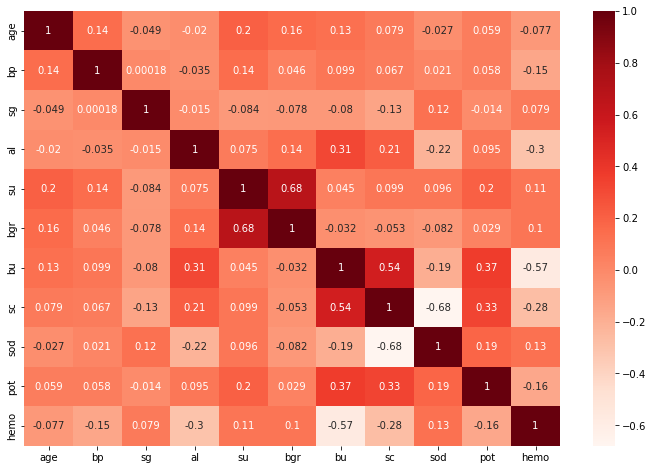

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",annot=True)